In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [36]:
data=pd.read_csv('https://raw.githubusercontent.com/pydeveloperashish/Stroke-Risk-Prediction-using-Machine-Learning/master/dataset/healthcare-dataset-stroke-data.csv')

# EDA

In [37]:
data.shape

(5110, 12)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [39]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
# Filling NAN values
#data['bmi'].value_counts()
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [41]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data.isnull().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [42]:
data.drop('id',axis=1,inplace=True)
data    

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removal

<AxesSubplot:>

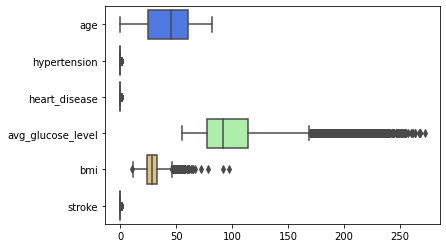

In [43]:
sns.boxplot(data=data,palette ='rainbow',orient='h')

In [44]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## Label Encoding

In [45]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [47]:
gender=enc.fit_transform(data['gender'])
gender

array([1, 0, 1, ..., 0, 1, 0])

In [57]:
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
ever_married=enc.fit_transform(data['ever_married'])
Residence_type=enc.fit_transform(data['Residence_type'])

In [58]:
data['work_type']=work_type
data['smoking_status']=smoking_status
data['gender']=gender
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,0
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,1
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,1
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,0


## Splitting data for Train and test

X ---train_X,test_X    80/20               
Y ---train_Y,test_Y

In [60]:
X=data.drop('stroke',axis=1)
Y=data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [62]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,residence_type
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2,0
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2,1
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0,1
123,1,56.0,1,0,1,2,0,249.31,35.800000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2,1
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0,1
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0,0


# Normalize

In [63]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,residence_type
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728,0.508023
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320,0.499985
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000,1.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000


In [64]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [65]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [67]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ..., -1.52604504,
         0.58675012, -1.02026398],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.21084566,
         1.51717466, -1.02026398],
       [-0.83822764,  1.23206472,  3.04066013, ...,  0.35342624,
         0.58675012,  0.98013849],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ..., -0.37243853,
         1.51717466, -1.02026398],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.89091336,
        -1.27409897, -1.02026398],
       [ 1.19059095,  1.49718033, -0.32887595, ...,  0.61266365,
        -1.27409897,  0.98013849]])

# Training

# Decision Tree 


In [98]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [69]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [70]:
dt.feature_importances_

array([0.04201675, 0.18226543, 0.02223773, 0.02239527, 0.00296279,
       0.03495569, 0.02477135, 0.31725061, 0.23505919, 0.08252821,
       0.03355697])

In [72]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'residence_type'],
      dtype='object')

In [78]:
Y_pred=dt.predict(X_test_std)

In [79]:
from sklearn.metrics import accuracy_score

In [82]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [83]:
ac_dt

0.9060665362035225

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [89]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [95]:
Y_pred_lr=lr.predict(X_test_std)

In [96]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [97]:
ac_lr

0.9471624266144814

# KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [101]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [107]:
Y_pred=knn.predict(X_test_std)

In [118]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [119]:
ac_knn

0.9452054794520548

# RandomForest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [111]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [120]:
Y_pred=rf.predict(X_test_std)

In [121]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [122]:
ac_rf

0.9452054794520548

# SVM

In [124]:
from sklearn.svm import SVC
sv=SVC()

In [125]:
sv.fit(X_train_std,Y_train)

SVC()

In [126]:
Y_pred=sv.predict(X_test_std)
ac_sv=accuracy_score(Y_test,Y_pred)

In [127]:
ac_sv

0.9471624266144814

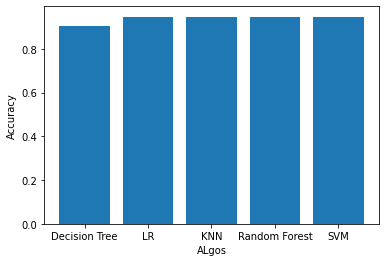

In [131]:
plt.bar(['Decision Tree','LR','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("ALgos")
plt.ylabel("Accuracy")
plt.show()

In [135]:
import pickle
filename = r'C:/Users/chamya/ML/Stroke_project/finalized_model_lr.sav'
pickle.dump(lr, open(filename,'wb'))